In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
from tqdm import tqdm

import persim as ps

%matplotlib inline

In [2]:
def parse_diagram_file(filename):
    diagram = open(filename,"r").read().split("\n\n")[:-1]
    diag_numpy =  [np.array([[float(interval.split()[0]),float(interval.split()[1])] for interval in dim.split("\n")[:-1]]) for dim in diagram]
    if len(diag_numpy) < 4:
        for i in range(4 - len(diag_numpy)):
            diag_numpy.append(np.array([[0.0,0.0]]))
    for i, dim in enumerate(diag_numpy):
        if len(dim) == 0:
            diag_numpy[i] = np.array([[0.0,0.0]])
    return diag_numpy

In [3]:
diagram_files = sorted([diag for diag in os.listdir() \
                        if (not (diag.startswith("hole") or diag.startswith("readability") or diag.endswith(".pdf")) \
                            and (diag.endswith(".word2vec") or diag.endswith(".glove_wiki") or diag.endswith(".glove_cc") or diag.endswith(".elmo") or diag.endswith(".bert")))])

In [4]:
diagrams_w2v    = {name.split(".")[0] : parse_diagram_file(name) for name in diagram_files if name.endswith(".word2vec")}
diagrams_glwiki = {name.split(".")[0] : parse_diagram_file(name) for name in diagram_files if name.endswith(".glove_wiki")}
diagrams_glcc   = {name.split(".")[0] : parse_diagram_file(name) for name in diagram_files if name.endswith(".glove_cc")}
diagrams_elmo   = {name.split(".")[0] : parse_diagram_file(name) for name in diagram_files if name.endswith(".elmo")}
diagrams_bert   = {name.split(".")[0] : parse_diagram_file(name) for name in diagram_files if name.endswith(".bert")}
names_w2v    = sorted(diagrams_w2v.keys())
names_glwiki = sorted(diagrams_glwiki.keys())
names_glcc   = sorted(diagrams_glcc.keys())
names_elmo   = sorted(diagrams_elmo.keys())
names_bert   = sorted(diagrams_bert.keys())

In [5]:
def count(diagram):
    return [len(dim) for dim in diagram[1:]]

def mean_lifetime(diagram):
    max_filtration_l = max([np.max(dim) for dim in diagram])
    return [np.mean(dim[:,1]-dim[:,0])/max_filtration_l for dim in diagram[1:]]

In [6]:
counts_w2v = {key : count(value) for key, value in diagrams_w2v.items()}
means_w2v = {key : mean_lifetime(value) for key, value in diagrams_w2v.items()}
counts_glwiki = {key : count(value) for key, value in diagrams_glwiki.items()}
means_glwiki = {key : mean_lifetime(value) for key, value in diagrams_glwiki.items()}
counts_glcc = {key : count(value) for key, value in diagrams_glcc.items()}
means_glcc = {key : mean_lifetime(value) for key, value in diagrams_glcc.items()}
counts_elmo = {key : count(value) for key, value in diagrams_elmo.items()}
means_elmo = {key : mean_lifetime(value) for key, value in diagrams_elmo.items()}
counts_bert = {key : count(value) for key, value in diagrams_bert.items()}
means_bert = {key : mean_lifetime(value) for key, value in diagrams_bert.items()}

In [7]:
counts = pd.DataFrame(columns=['name','embedding', 'dim', 'count'])
for name, diag in counts_w2v.items():
    for i, count in enumerate(diag):
        counts = counts.append({"name": name, "embedding": "word2vec", "dim": i+1, "count": count}, ignore_index=True)
        
for name, diag in counts_glwiki.items():
    for i, count in enumerate(diag):
        counts = counts.append({"name": name, "embedding": "glove_wiki", "dim": i+1, "count": count}, ignore_index=True)
        
for name, diag in counts_glcc.items():
    for i, count in enumerate(diag):
        counts = counts.append({"name": name, "embedding": "glove_cc", "dim": i+1, "count": count}, ignore_index=True)
        
for name, diag in counts_elmo.items():
    for i, count in enumerate(diag):
        counts = counts.append({"name": name, "embedding": "elmo", "dim": i+1, "count": count}, ignore_index=True)
        
for name, diag in counts_bert.items():
    for i, count in enumerate(diag):
        counts = counts.append({"name": name, "embedding": "bert", "dim": i+1, "count": count}, ignore_index=True)

In [8]:
means = pd.DataFrame(columns=['name','embedding', 'dim', 'mean'])
for name, diag in means_w2v.items():
    for i, mean in enumerate(diag):
        means = means.append({"name": name, "embedding": "word2vec", "dim": i+1, "mean": mean}, ignore_index=True)
        
for name, diag in means_glwiki.items():
    for i, mean in enumerate(diag):
        means = means.append({"name": name, "embedding": "glove_wiki", "dim": i+1, "mean": mean}, ignore_index=True)
        
for name, diag in means_glcc.items():
    for i, mean in enumerate(diag):
        means = means.append({"name": name, "embedding": "glove_cc", "dim": i+1, "mean": mean}, ignore_index=True)
        
for name, diag in means_elmo.items():
    for i, mean in enumerate(diag):
        means = means.append({"name": name, "embedding": "elmo", "dim": i+1, "mean": mean}, ignore_index=True)
        
for name, diag in means_bert.items():
    for i, mean in enumerate(diag):
        means = means.append({"name": name, "embedding": "bert", "dim": i+1, "mean": mean}, ignore_index=True)

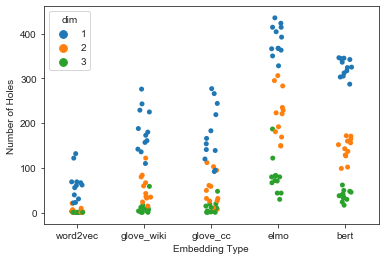

In [13]:
counts_plot_scatter = sns.stripplot(data=counts, x="embedding", y="count", hue="dim")
counts_plot_scatter.set(
    xlabel='Embedding Type', 
    ylabel='Number of Holes'
)
counts_plot_scatter.figure.savefig("counts_plot_scatter.pdf")

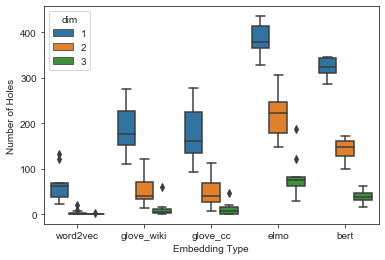

In [14]:
counts_plot_box = sns.boxplot(data=counts, x="embedding", y="count", hue="dim")
counts_plot_box.set(
    xlabel='Embedding Type', 
    ylabel='Number of Holes'
)
counts_plot_box.figure.savefig("counts_plot_box.pdf")

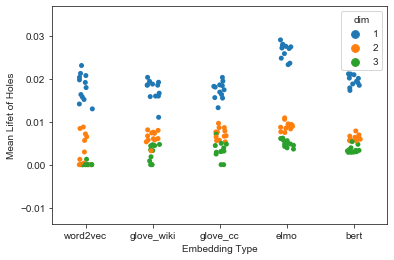

In [15]:
means_plot_scatter = sns.stripplot(data=means, x="embedding", y="mean", hue="dim")
means_plot_scatter.set(
    xlabel='Embedding Type', 
    ylabel='Mean Lifet of Holes'
)
means_plot_scatter.figure.savefig("means_plot_scatter.pdf")

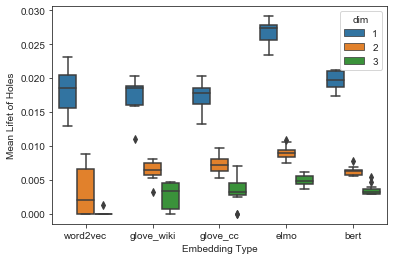

In [16]:
means_plot_box = sns.boxplot(data=means, x="embedding", y="mean", hue="dim")
means_plot_box.set(
    xlabel='Embedding Type', 
    ylabel='Mean Lifet of Holes'
)
means_plot_box.figure.savefig("means_plot_box.pdf")